<a href="https://colab.research.google.com/github/MitchellPritchett/pdse_github_tmp/blob/main/%5BPDSE%5D%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9B%8C%ED%81%AC%EC%83%B5_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 27.30 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [6]:
cd deep-learning-from-scratch/ch03

/content/deep-learning-from-scratch/ch03


In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

In [10]:
X_train.shape

(60000, 784)

In [11]:
y_train.shape

(60000,)

In [12]:
X_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000,)

5
(784,)
(28, 28)


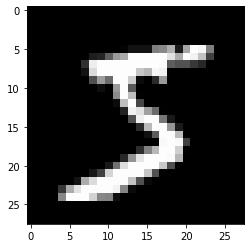

In [27]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = X_train[0]
label = y_train[0]
print(label)

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# 신경망 추론 구현하기
# 매개변수는 이미 주어진 데이터를 사용한다.(sample_weight.pkl 에 저장되어 있음)
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
import pickle

# 이 함수는 추론할 데이터를 로딩합니다.
def get_data():
    ###############################################################################################################
    # TO DO: 추론할 데이터 로딩하기
    # input: 
    # output: X_test, y_test
    # condition: 1. 데이터를 normalize 해주세요. 2. 데이터를 1차원으로 바꿔주세요. 3. 원핫인코딩은 하지 않습니다.
    # hint: 1. load_mnist() 함수는 (train, train_label), (test, test_label) 꼴로 리턴합니다.
    #       2. load_mnist() 함수의 파라미터로는 normalize, flatten, one_hot_label 이 있고 모두 bool 값을 가집니다.
    ######################################### modification starts here ############################################
    (X_train, y_train), (         ) =     
    ######################################### modification ends here ##############################################
    return X_test, y_test

# 이 함수는 이미 학습된 매개변수를 가지고 와서 신경망을 initializing 합니다.
# DO NOT MODIFY
def init_network():
    with open("sample_weight.pkl" , 'rb') as f:
        network = pickle.load(f)
    print("This is sample weights": network) # 출력해서 신경망(매개변수) 확인하기
    return network

# sigmoid fuction
# DO NOT MODIFY
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax function
# DO NOT MODIFY
def softmax(x):
    c = np.max(x)
    x = x - c 
    return np.exp(x) / np.sum(np.exp(x))

# 이 함수로 추론을 합니다.
def predict(network, x):
    ###############################################################################################################
    # TO DO: feed forward 신경망 연산하기
    # input: network (dict) --> {'W1': ..., 'W2': ..., 'W3': ..., 'b1': ..., 'b2': ..., 'b3': ... }
    #        x (numpy array): 테스트할 데이터가 들어갈 자리
    # output: y (numpy array): predicted y labels
    # condition: 1. 3층 신경망
    #            2. sigmoid as activation function
    #            3. 출력층은 softmax
    ######################################### modification starts here ############################################
    W1, W2, W3 = network['W1'], 
    b1, b2, b3 = 

    a1 = x.dot() + 
    z1 = sigmoid()
    a2 = 
    z2 = 
    a3 = 
    y = softmax()
    ######################################### modification ends here ##############################################
    print("This is the prediction for the 0th image:", y[0])
    return y

# 이 함수로 정확도(몇 개 맞췄나)를 확인해봅니다.
def accuracy(y_pred, y_test):
    ###############################################################################################################
    # TO DO: accuracy 확인하기
    # input: y_pred (numpy array), y_test (numpy array)
    # output: accuracy
    # hint: 1. y_pred[i] 는 i번째 이미지에 대한 예측값입니다. 
    #          각 인덱스는 손글씨 숫자를 의미하고 해당 원소는 해당 인덱스에 속할 확률을 의미합니다.
    #          우리는 가장 높은 확률을 부여받은 숫자가 무엇인지 알고 싶습니다.
    #          numpy.argmax() 메서드를 찾아보세요.
    #       2. numpy의 sum, len 혹은 더 간단하게 하려면 average 매서드를 써보세요.
    ######################################### modification starts here ############################################
    y_pred = np.argmax()

    accuracy = np.average(y_red == y_test)
    ######################################### modification ends here ##############################################
    return accuracy

In [ ]:
# 자 이제 사용할 함수를 모두 만들었습니다.
# 추론을 해보겠습니다.

# get_data()로 테스트 데이터를 불러옵니다.
X_test, y_test = get_data()

# 네트워크를 이니셜라이징합니다 (== 매개변수를 가지고 있는 딕셔너리를 불러옵니다)
network = init_network()

# 추론해보고 성능을 확인합니다.
num_test = X_test.shape[0]
num_correct = 0

for i in range(num_test):
    y = predict(network, X_test[i])
    ###############################################################################################################
    # TO DO: accuracy 확인하기
    # hint: 1. y는 i번째 이미지에 대한 예측값입니다. 
    #          각 인덱스는 손글씨 숫자를 의미하고 해당 원소는 해당 인덱스에 속할 확률을 의미합니다.
    #          우리는 가장 높은 확률을 부여받은 숫자가 무엇인지 알고 싶습니다.
    #          numpy.argmax() 메서드를 찾아보세요.
    ######################################### modification starts here ############################################
    y_pred = 
    # 예측한 것과 ground truth lable이 같다면, num_correct에 1 추가
    if 

# accuracy 계산하기. 정확도 == 맞은 수 / 전체 데이터 수
accuracy = 
    ######################################### modification ends here ##############################################

# Your answer should be about 93.52%
print("Accuracy:", accuracy)